In [1]:
#Author Alex J. Yang, alexjieyang@outlook.com

import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import random
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path1 = 
f1 = pd.read_csv(path1)

In [5]:
f1.head(3)

,au,pub_num,tc,h,g,DC,CC,dh,ch,TCD,TC,TD,CitCDP,type
0,p. bassi,4,57,3,4,18,39,2,2,0.092404,0.258095,0.165691,2.056634,non laureate
1,cl. gabriel,4,15,2,4,0,15,0,2,-0.027606,0.000000,0.027606,1.988942,non laureate
2,m. j. norgett,1,14,1,1,5,9,1,1,-0.007812,0.009766,0.017578,0.498656,non laureate


In [6]:
def get_IR(threshold , v , f1):
    k = int(np.floor(len(f1)*threshold))
    f2 = f1.sort_values([v],ascending= False)
    f21 = f2.head(k)
    d = len(f21[f21['type']=='laureate'])/130
    return d

In [7]:
thresholdlst = [0.001,0.005,0.01,0.02,0.05]

In [8]:
threshold = 0.01
vlst = [ 'pub_num','tc', 'h','g', 'DC', 'CC','dh', 'ch','TCD', 'TC','TD', 'CitCDP']

In [9]:
dlst = [get_IR(threshold , v , f1) for v in vlst]

In [44]:
def draw_bar(dlst , path , label):
    f, ax = plt.subplots(figsize=(7, 10))
    c = ['#6E2C00','#A04000','#BA4A00','#D35400','#154360','#1F618D','#2980B9','#2874A6','#0B5345','#117A65','#16A085','#148F77']
    y_pos = [1,2,3,4,5.5,6.5,7.5,8.5,10,11,12,13]
    plt.barh(y_pos,dlst,align='center', color= c,alpha=0.9,capsize=10)
    plt.yticks(y_pos,['Publications','Toal citation','h-index','g-index','SDC','SCC','D h-index','C h-index','Total CD-index', 'Total C-index','Total D-index', 'Citation-CD P'],fontsize = 30)
    for x, v in enumerate(dlst):
        plt.text(v + 0.02, y_pos[x]-0.2, str(round(v, 2)), color=c[x], fontsize=25)
    plt.xlim((0,1))
    plt.xticks([0,0.2,0.4,0.6,0.8,1.0],fontsize=30)
    plt.xlabel('IR',fontsize = 25)
    plt.title('IR z={}'.format(label),fontsize = 30)
    ax.vlines(dlst[4],0,14, linestyles='dashed',colors = '#154360',alpha = 0.5)

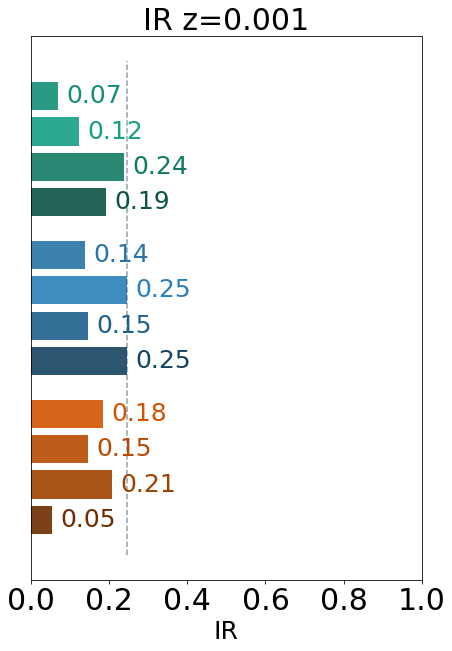

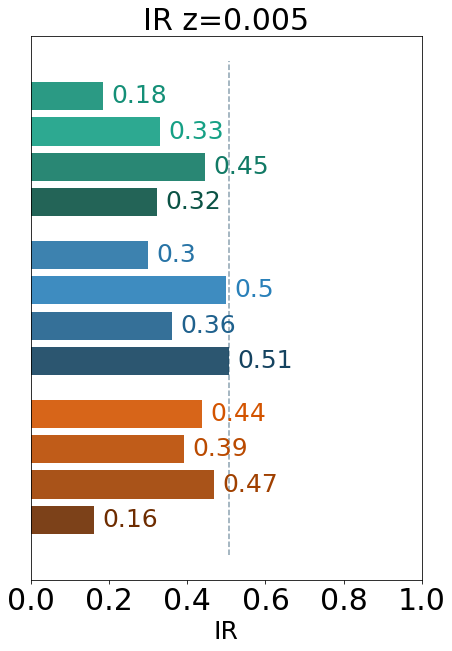

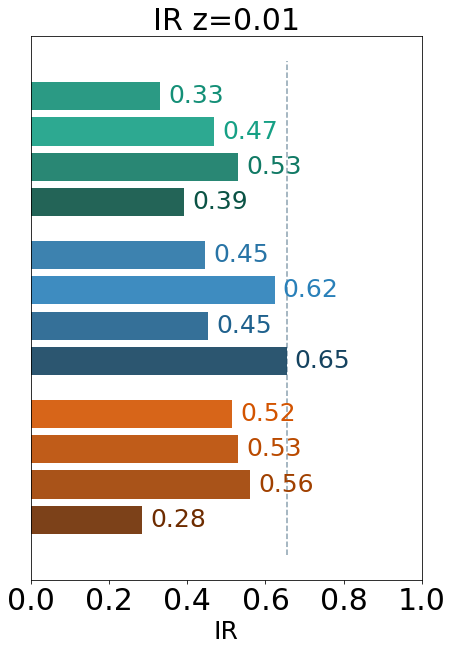

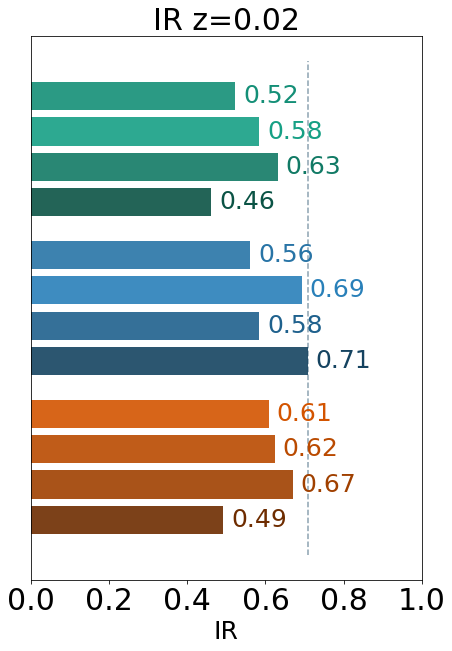

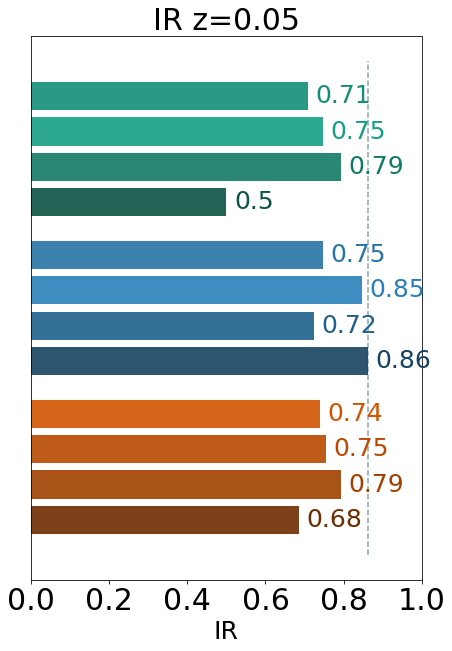

In [50]:
for i in range(len(thresholdlst)):
    threshold = thresholdlst[i]
    path = i
    label = str(threshold)
    dlst = [get_IR(threshold , v , f1) for v in vlst]
    draw_bar(dlst , path , label)

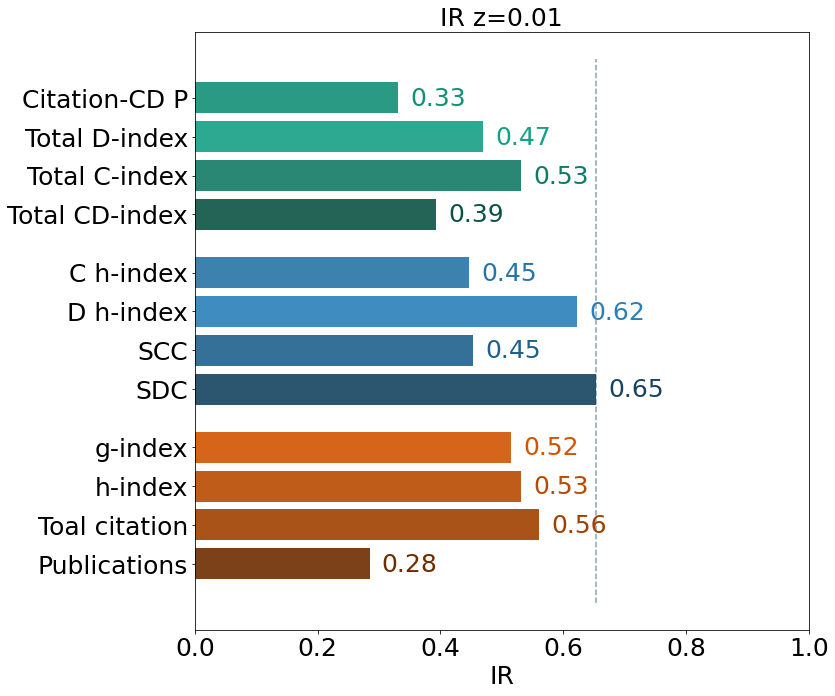

In [46]:
def draw_bar2(dlst , path , label):
    f, ax = plt.subplots(figsize=(11, 11))
    c = ['#6E2C00','#A04000','#BA4A00','#D35400','#154360','#1F618D','#2980B9','#2874A6','#0B5345','#117A65','#16A085','#148F77']
    y_pos = [1,2,3,4,5.5,6.5,7.5,8.5,10,11,12,13]
    plt.barh(y_pos,dlst,align='center', color= c,alpha=0.9,capsize=10)
    plt.yticks(y_pos,['Publications','Toal citation','h-index','g-index','SDC','SCC','D h-index','C h-index','Total CD-index', 'Total C-index','Total D-index', 'Citation-CD P'],fontsize = 25)
    for x, v in enumerate(dlst):
        plt.text(v + 0.02, y_pos[x]-0.2, str(round(v, 2)), color=c[x], fontsize=25)
    plt.xlim((0,1))
    plt.xticks([0,0.2,0.4,0.6,0.8,1.0],fontsize=25)
    plt.xlabel('IR',fontsize = 25)
    plt.title('IR z={}'.format(label),fontsize = 25)
    ax.vlines(dlst[4],0,14, linestyles='dashed',colors = '#154360',alpha = 0.5)
i = 2
threshold = thresholdlst[i]
path = i
label = str(threshold)
dlst = [get_IR(threshold , v , f1) for v in vlst]
draw_bar2(dlst , path , label)

# AR

In [51]:
def get_AR( v , f1):
    f2 = f1.sort_values([v],ascending= False)
    f2.index = range(len(f2))
    lst = f2[f2['type']=='laureate'].index
    d = sum(lst)/(lst[-1] - lst[0])/len(lst)
    return d

In [52]:
dlst = [get_AR(v , f1) for v in vlst]

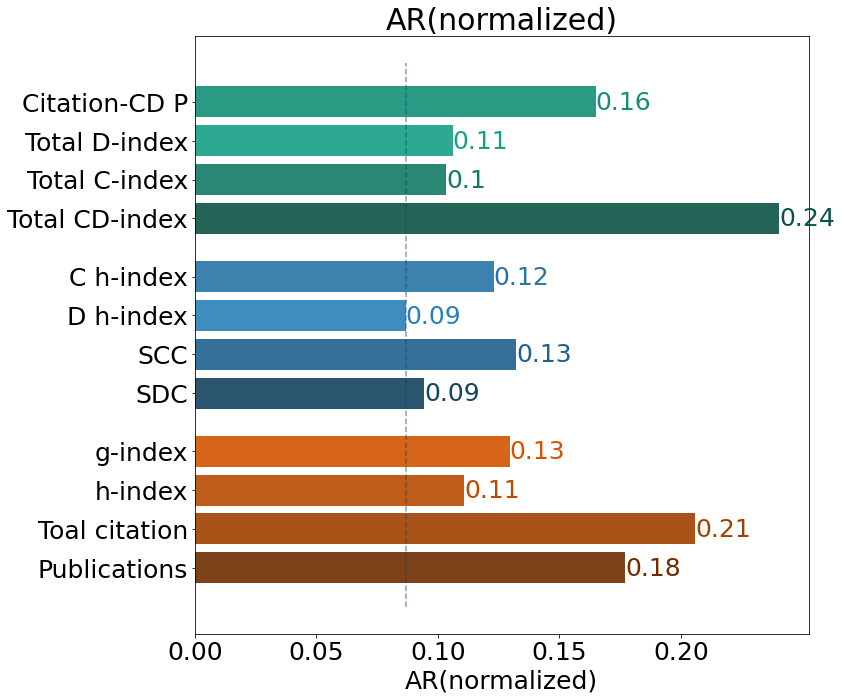

In [56]:
f, ax = plt.subplots(figsize=(11, 11))
c = ['#6E2C00','#A04000','#BA4A00','#D35400','#154360','#1F618D','#2980B9','#2874A6','#0B5345','#117A65','#16A085','#148F77']
y_pos = [1,2,3,4,5.5,6.5,7.5,8.5,10,11,12,13]

plt.barh(y_pos,dlst,align='center', color= c,alpha=0.9,capsize=10)

plt.yticks(y_pos,['Publications','Toal citation','h-index','g-index','SDC','SCC','D h-index','C h-index','Total CD-index', 'Total C-index','Total D-index', 'Citation-CD P'],fontsize = 25)
for x, v in enumerate(dlst):
    plt.text(v, y_pos[x]-0.2, str(round(v, 2)), color=c[x], fontsize=25)
plt.xticks([0,0.05,0.10,0.15,0.20],fontsize=25,)
plt.xlabel(r'AR(normalized)',fontsize = 25)
plt.title(r'AR(normalized)',fontsize = 30)
ax.vlines(dlst[6],0,14, linestyles='dashed',colors = '#154360',alpha = 0.5)

# BASIC

In [57]:
def get_AR( v , f1):
    f2 = f1.sort_values([v],ascending= False)
    f2.index = range(len(f2))
    lst = f2[f2['type']=='laureate'].index
    d = sum(lst)/len(lst)
    return d

In [58]:
dlst = [get_AR(v , f1) for v in vlst]

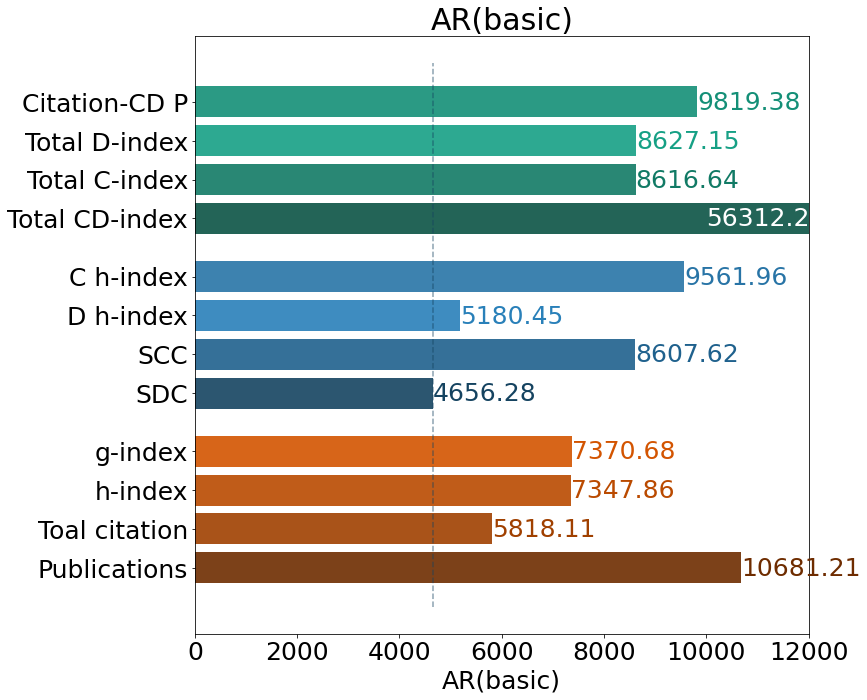

In [65]:
f, ax = plt.subplots(figsize=(11, 11))
c = ['#6E2C00','#A04000','#BA4A00','#D35400','#154360','#1F618D','#2980B9','#2874A6','#0B5345','#117A65','#16A085','#148F77']
y_pos = [1,2,3,4,5.5,6.5,7.5,8.5,10,11,12,13]

plt.barh(y_pos,dlst,align='center', color= c,alpha=0.9,capsize=10)

plt.yticks(y_pos,['Publications','Toal citation','h-index','g-index','SDC','SCC','D h-index','C h-index','Total CD-index', 'Total C-index','Total D-index', 'Citation-CD P'],fontsize = 25)
for x, v in enumerate(dlst):
    if x == 8:
        plt.text(10000, y_pos[x]-0.2, str(round(v, 2)), color='white', fontsize=25)
    else:
        plt.text(v, y_pos[x]-0.2, str(round(v, 2)), color=c[x], fontsize=25)
plt.xlim((0,12000))
plt.xticks(fontsize=25,)
plt.xlabel(r'AR(basic)',fontsize = 25)
plt.title(r'AR(basic)',fontsize = 30)
ax.vlines(dlst[4],0,14, linestyles='dashed',colors = '#154360',alpha = 0.5)